<a href="https://colab.research.google.com/github/mca2309/OCR-using-OpenCV-and-Tensorflow-with-GUI/blob/R3/OCR_on_3D_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Downloading and extracting the dataset from kaggle
from google.colab import drive
drive.mount('/content/drive')

!pip install kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

!kaggle datasets download -d daavoo/3d-mnist

import zipfile

file_path = '/content/3d-mnist.zip'

!mkdir 3d-mnist

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/3d-mnist')

Mounted at /content/drive
 92% 140M/153M [00:01<00:00, 115MB/s] 
100% 153M/153M [00:01<00:00, 117MB/s]


In [24]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import numpy as np
import h5py
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

In [3]:
# Load the dataset
f = h5py.File("/content/3d-mnist/full_dataset_vectors.h5", "r")
trainX = f["X_train"][:]
trainY = f["y_train"][:]
testX = f["X_test"][:]
testY = f["y_test"][:]

In [4]:
# Reshape dataset to have a single channel and add a depth dimension
trainX = trainX.reshape((trainX.shape[0], 16, 16, 16, 1))
testX = testX.reshape((testX.shape[0], 16, 16, 16, 1))

In [5]:
# One-hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [6]:
# Scale pixels
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

In [7]:
# Create a CNN
model = Sequential()
model.add(Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(16, 16, 16, 1)))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [18]:
# Compile model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
# Fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
# save our model
model.save('mnist_3D_cnn.h5')

Epoch 1/10
313/313 [==============================] - 3s 9ms/step - loss: 1.1087 - accuracy: 0.6084 - val_loss: 1.1293 - val_accuracy: 0.5925
Epoch 2/10
313/313 [==============================] - 3s 8ms/step - loss: 1.1021 - accuracy: 0.6114 - val_loss: 1.0832 - val_accuracy: 0.6030
Epoch 3/10
313/313 [==============================] - 3s 9ms/step - loss: 1.0986 - accuracy: 0.6134 - val_loss: 1.0912 - val_accuracy: 0.5940
Epoch 4/10
313/313 [==============================] - 3s 9ms/step - loss: 1.0820 - accuracy: 0.6195 - val_loss: 1.0668 - val_accuracy: 0.6215
Epoch 5/10
313/313 [==============================] - 3s 8ms/step - loss: 1.0749 - accuracy: 0.6192 - val_loss: 1.0652 - val_accuracy: 0.6105
Epoch 6/10
313/313 [==============================] - 2s 6ms/step - loss: 1.0678 - accuracy: 0.6234 - val_loss: 1.0549 - val_accuracy: 0.6130
Epoch 7/10
313/313 [==============================] - 2s 7ms/step - loss: 1.0657 - accuracy: 0.6232 - val_loss: 1.0536 - val_accuracy: 0.6235
Epoch 

In [22]:
# Load the model
model = load_model("mnist_3D_cnn.h5")

In [23]:
# Evaluate the model
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy}')

63/63 [==============================] - 5s 72ms/step - loss: 1.0618 - accuracy: 0.6185
Test accuracy: 0.6184999942779541


In [25]:
# Predict the test set
y_predicted = model.predict(testX)
y_predicted = np.argmax(y_predicted, axis=1)

63/63 [==============================] - 8s 117ms/step


In [26]:
# Print classification report
print(classification_report(np.argmax(testY, axis=1), y_predicted))

              precision    recall  f1-score   support

           0       0.70      0.89      0.79       170
           1       0.99      0.89      0.94       252
           2       0.60      0.53      0.57       232
           3       0.54      0.46      0.50       214
           4       0.49      0.57      0.53       220
           5       0.55      0.51      0.53       174
           6       0.60      0.50      0.54       174
           7       0.67      0.67      0.67       198
           8       0.49      0.66      0.56       178
           9       0.52      0.47      0.50       188

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.61      2000
weighted avg       0.62      0.62      0.62      2000



In [27]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

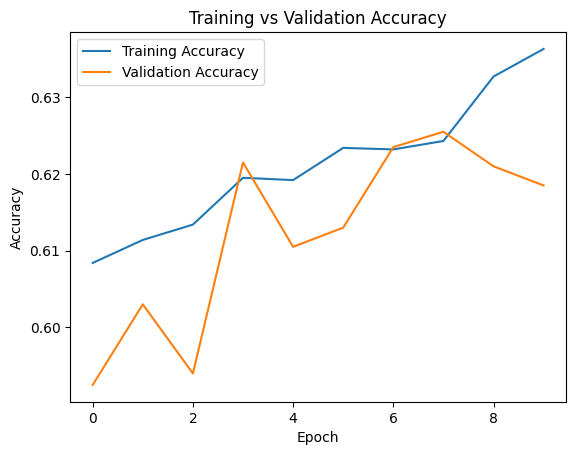

In [96]:
# Plot the training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [28]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(testY, axis=1), y_predicted)

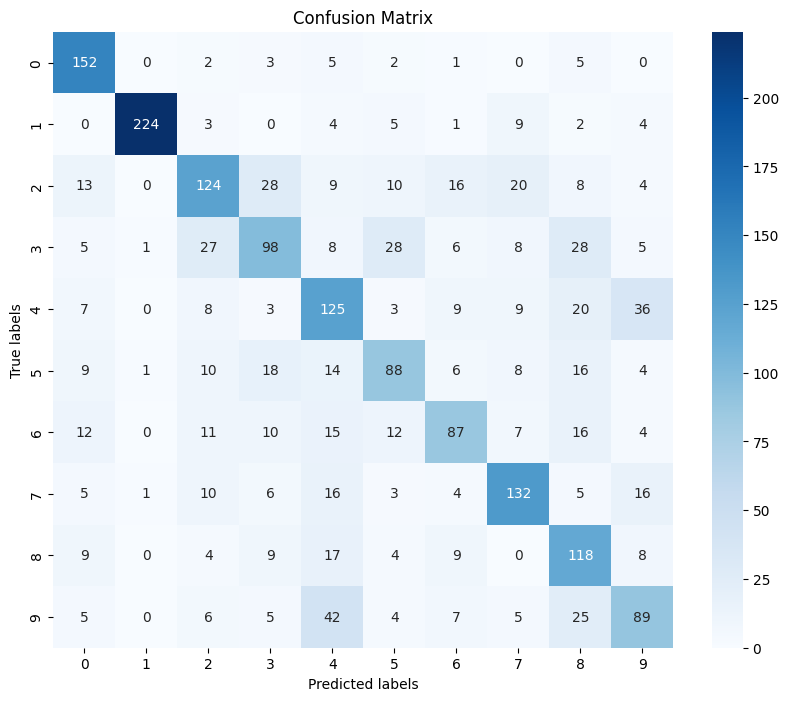

In [29]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Retraining the model

In [30]:
import numpy as np
import h5py

# Generate synthetic new data
num_samples = 1000
X_new = np.random.rand(num_samples, 16, 16, 16, 1)  # Random 3D images
y_new = np.random.randint(0, 10, size=num_samples)  # Random labels (0-9)

# Save the synthetic new data to an HDF5 file
with h5py.File('synthetic_new_data.h5', 'w') as f:
    f.create_dataset('X_new', data=X_new)
    f.create_dataset('y_new', data=y_new)


In [32]:
new_data_file_path = "/content/synthetic_new_data.h5"

# Load the new data
new_data_f = h5py.File(new_data_file_path, "r")
X_new = new_data_f["X_new"][:]
y_new = new_data_f["y_new"][:]

In [33]:
# Reshape the new data
X_new = X_new.reshape((X_new.shape[0], 16, 16, 16, 1))

In [34]:
# One-hot encode the target values
y_new = to_categorical(y_new)

In [35]:
# Scale the new data
X_new = X_new.astype('float32') / 255.0

In [ ]:
# Split the new data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [36]:
# Retrain the model with the new data and validation set
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
32/32 [==============================] - 12s 365ms/step - loss: 2.3147 - accuracy: 0.1070
Epoch 2/5
32/32 [==============================] - 10s 304ms/step - loss: 2.3021 - accuracy: 0.1170
Epoch 3/5
32/32 [==============================] - 9s 267ms/step - loss: 2.3115 - accuracy: 0.1060
Epoch 4/5
32/32 [==============================] - 9s 297ms/step - loss: 2.3114 - accuracy: 0.1210
Epoch 5/5
32/32 [==============================] - 9s 281ms/step - loss: 2.2970 - accuracy: 0.1240


In [37]:
# Save the updated model
model.save('updated_mnist_3D_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
model = load_model("updated_mnist_3D_cnn.h5")

In [39]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Test accuracy: {accuracy}')

63/63 [==============================] - 6s 94ms/step - loss: 2.1813 - accuracy: 0.2975
Test accuracy: 0.29750001430511475


In [ ]:
# Predict the test set
y_predicted = model.predict(X_val)
y_predicted = np.argmax(y_predicted, axis=1)

In [ ]:
# Print classification report
print(classification_report(np.argmax(y_val, axis=1), y_predicted))

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Plot the training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_val, axis=1), y_predicted)

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()